In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Precession of the Perihelion of Mercury
## Lecture 20

**Follows Giordano 4.3: Precession of the Perihelion of Mercury**

### Intro Video

https://www.youtube.com/watch?v=hSXNE0pNtr8


Kepler's First Law that says planets move in elliptical orbits with the Sun at one focus is a direct result of the inverse square law of Newton's Law of Gravitation:

$$ F_G = \frac{G M_s M_e}{r^2} $$

If the law was of some other form, such as

$$ F_G = \frac{G M_s M_e}{r^\beta} $$

for same value of $\beta$ different from 2, then the orbits of the planets would not be stable ellipses.  Section 4.2 of Giordano explores this stability.  It shows that even for value of $\beta$ close 2, (like $\beta = 2.01$) the orbits would not be stable and the orbit itself would tend to rotate over time.

The solar-system itself can be thought of as an experiment to test the accuracy of the inverse-square law.  In reality, the solar system is more than the Sun and single planet -- the perturbative effects of all the other planets need to be taken into account to correctly the expected deviations from Kepler's Laws.   One such deviation is that planets with eccentric orbits will *precess* over time. That is, the axes of the elliptical orbit itself rotate. We can be specific about this by discussing the rate at which the perihelion (nearest point to the Sun) precesses around the Sun.

By the middle of 19th century, the corrections to the orbits had been calculated using perturbation theory to estimate the precession rate.  If all of the planets are included in the calculation, the precession rate of Mercury's orbit was estimated as **523 arcseconds/century**. This mostly due to Jupiter. We'll try and calculate this in our next lecture.

However, astronomy is a precise science can careful observations measured the actual precession of the perihelion of Mercury was **566 arcseconds/century**. The perihelion rotates around once every 230,000 years.  Those are precise measurements!

The difference between theory and experiment, a mere 43 arcseconds/century, was a mystery to 19th century physics. As mentioned in the video, the solution came with Einstein's theory of general relativity (GR) in 1917.

As you may know, GR describes gravity not as force but as a curvature in space-time.  Provided that objects are not too close or too massive, GR makes a similar prediction for the force of gravity that of Newton's law.  But, if the objects are close enough, GR predicts deviations from the inverse-square law.  

The Sun and Mercury are close enough for those deviations to be significant and can be used to explain the discrepancy of 43 arcseconds/century.  This was one of the first major successes of the theory of general relativity.

Our goal in  this lecture is calculate this 43 arcseconds/century deviation.  While it can be done analytical using GR, we can also do it numerically by extending our model for the calculation of an orbiting planet.  



The magnitude of the force law predicted by GR is

$$F_G \approx \frac{G M_S M_M}{r^2}\left(1+\frac{\alpha}{r^2}\right) $$

where $M_M$ is the mass of Mercury and $\alpha = 1.1 \times 10^{-8}\;\mathrm{AU}^2$.  This value comes from a the first  perturbation expansion in powers of $r^{-1}$.  This deviation from an inverse-square law is what leads to the precession of the perihelion.

One complication is that the precession rate for Mercury is so a naive simulation would need to be computed for 230,000 years or so to be able to directly measure the precession rate.  We would never want to wait for such a model to finish running! 

One strategy is use much larger values of $\alpha$ and then predict the precession rate as a function of $\alpha$.  We can then estimate the rate of precession for $\alpha = 1.1 \times 10^{-8}\;\mathrm{AU}^2$.

## Equations of Motion

As before, we start with Newton's Second Law:
\begin{align}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} &= \frac{F_{G,x}}{M_M}  \\
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} &= \frac{F_{G,y}}{M_M}
\end{align}

which can be rewritten as a system of four first order differential equations:

\begin{align}
\frac{\mathrm{d}v_x}{\mathrm{d}t} &= -\frac{G M_s x}{r^3}\left(1+\frac{\alpha}{r^2}\right) \\
\frac{\mathrm{d}x}{\mathrm{d}t} &= v_x \\
\frac{\mathrm{d}v_y}{\mathrm{d}t} &= -\frac{G M_s y}{r^3}\left(1+\frac{\alpha}{r^2}\right) \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= v_y 
\end{align}

## Numerical method

The numerical equations using the Euler Cromer method are
 
\begin{align}
v_{x,i+1} &= v_{x,i} - \frac{4\pi^2x_i}{r^3_i}\Delta t\left(1+\frac{\alpha}{r^2_i}\right) \\
x_{i+1} &= x_i + v_{x,i+1} \Delta t  \\
v_{y,i+1} &= v_{y,i} - \frac{4\pi^2y_i}{r^3_i}\Delta t\left(1+\frac{\alpha}{r^2_i}\right) \\
y_{i+1} &= y_i + v_{y,i+1} \Delta t  \\
\end{align}

Recall that we are measuring distance in astronomical units (AU) and time in years (yr).

 We could go ahead and code this, but what about if we chose to attack the problem using the Runge-Kutta 4 method. 

In [33]:
π = np.pi

def orbit(tmax = 1.0, dt = 0.001, α = 0.0, v0 = 2*π, x0 = 1):
    """
    Calculate the orbit of planet
    α is the correction due to general relativity.
    """

    # number of timesteps
    N = round(tmax/dt)

    # allocate arrays
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    t = np.zeros(N)
    
    # initialise position of planet in AU
    x[0] = x0
    y[0] = 0

    # initialise velocity of planet in AU/yr
    vx[0] = 0
    vy[0] = v0

    def f(x, y, vx, vy):
        r = np.sqrt(x**2+y**2)
        dxdt = vx
        dydt = vy
        dvxdt = - (4*π**2*x)/(r**3)*(1+α/r**2)
        dvydt = - (4*π**2*y)/(r**3)*(1+α/r**2)
        
        return [dxdt, dydt, dvxdt, dvydt]
        
    # loop over the timesteps
    for i in range(N-1):
        t[i+1] = t[i] + dt
        
        # estimate slope at initial point
        sx1, sy1, svx1, svy1 = f(x[i], y[i], vx[i], vy[i])
        
        # estimate slope at mid point
        x1  = x[i]   + sx1  * dt/2
        y1  = y[i]   + sy1  * dt/2
        vx1 = vx[i]  + svx1 * dt/2
        vy1 = vy[i]  + svy1 * dt/2
        sx2, sy2, svx2, svy2 = f(x1, y1, vx1, vy1)
        
        # improved estimate slope at mid point
        x2 = x[i] + sx2 * dt/2
        y2 = y[i] + sy2 * dt/2
        vx2 = vx[i] + svx2 * dt/2
        vy2 = vy[i] + svy2 * dt/2
        sx3, sy3, svx3, svy3 = f(x2, y2, vx2, vy2)
        
        # estimate slope at final point
        x3 = x[i] + sx3 * dt
        y3 = y[i] + sy3 * dt
        vx3 = vx[i] + svx3 * dt
        vy3 = vy[i] + svy3 * dt
        sx4, sy4, svx4, svy4 = f(x3, y3, vx3, vy3)    
        
        # estimate final point
        x[i+1] = x[i] + (sx1 + 2*sx2 + 2*sx3 + sx4)/6 * dt
        y[i+1] = y[i] + (sy1 + 2*sy2 + 2*sy3 + sy4)/6 * dt
        vx[i+1] = vx[i] + (svx1 + 2*svx2 + 2*svx3 + svx4)/6 * dt
        vy[i+1] = vy[i] + (svy1 + 2*svy2 + 2*svy3 + svy4)/6 * dt
        
    return x, y, vx, vy, t

### Planetary Data


In [ ]:
data = { 'Mercury' : {'m':2.4e23, 'a':0.39,  'e':0.206},
         'Venus'   : {'m':4.9e24, 'a':0.72,  'e':0.007},   
         'Earth'   : {'m':6.0e24, 'a':1.00,  'e':0.017},  
         'Mars'    : {'m':6.6e23, 'a':1.52,  'e':0.093},
         'Jupiter' : {'m':1.9e27, 'a':5.20,  'e':0.048},
         'Saturn'  : {'m':5.7e26, 'a':9.54,  'e':0.056},
         'Uranus'  : {'m':8.8e25, 'a':19.19, 'e':0.046},
         'Neptune' : {'m':1.03e26,'a':30.06, 'e':0.010},
         'Pluto'   : {'m':1.3e22, 'a':39.53, 'e':0.248},
        }

To compute the orbit of Mercury we need to know the correct velocity to use as an initial condition 

Here are some of the helper functions we introduced in [Lecture 19]().

In [34]:
def plot_orbit(x, y):
    "Make a plot of planet showing the Sun"
    
    plt.plot(x, y, 'k-', linewidth=0.5)

    # Plot the Sun at the origin
    plt.plot(0, 0, '.',color="yellow", markersize=40, markeredgecolor='black')
    # Plot the Earth at the final position
    plt.plot(x[-1], y[-1], '.', color= 'k', markersize=15)

    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    plt.axis('equal')
    
def calc_eccentricity(x, y, t):
    "Calculate the eccentricity of an orbit"
    
    # major semiaxis
    a = (max(x)-min(x))/2
    # minor semiaxis
    b = (max(y)-min(y))/2
    
    #if b > a:
    #    a, b = b, a

    # compute eccentricity
    e = np.sqrt(1 - b**2/a**2)
    
    return e

In [36]:
from ipywidgets import interact

@interact(v0=(6, 11, 0.01))
def investigate_orbit(v0=8.2):
    planetname = 'Mercury'
    planet = data[planetname]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    x0 = (1+planet['e'])*planet['a']
    x, y, vx, vy, t = orbit(v0=v0, tmax = 1, x0 = x0)
    e = calc_eccentricity(x, y, t)

    plt.sca(axes[0])
    plot_orbit(x, y)

    plt.sca(axes[1])
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('t (yr)')
    plt.ylabel('x or y (AU)')
    
    plt.suptitle('{}: v0 = {:.2f}, e = {:.3f}, e_obs = {:.3f}'.format(planetname, v0, e, planet['e']), fontsize=14)

interactive(children=(FloatSlider(value=8.2, description='v0', max=11.0, min=6.0, step=0.01), Output()), _dom_classes=('widget-interact',))

In [37]:
def eccentricity_error(v0, planetname='Mercury'):
    planet = data[planetname]
    
    x0 = (1+planet['e'])*planet['a']
    x, y, vx, vy, t = orbit(v0=v0, tmax = 1, x0 = x0)
    e = calc_eccentricity(x, y, t)
    
    return abs(e-planet['e'])

In [38]:
from scipy import optimize
optimize.brent(eccentricity_error, brack=(7, 11))

8.163734256538973

Why the difference?  Plot error vs initial velocity:

Text(0,0.5,'error')

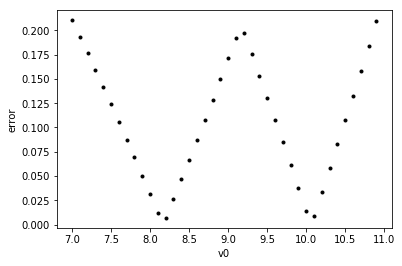

In [39]:
for v0 in np.arange(7, 11, 0.1):
    err = eccentricity_error(v0)
    plt.plot(v0, err, 'k.')
plt.xlabel('v0')
plt.ylabel('error')

For comparison, the book shows a completely analytical way of determining the initial velocity of Mercury. In any case, we can now look at the precession of Mercury's orbit over longer times if we include the effects of general relativity.

In [40]:
@interact(α=(0, 0.02, 0.0001))
def investigate_precession(α = 0):
    planet = data['Mercury']
    x0 = (1+planet['e'])*planet['a']
    v0 = 8.2 # AU/yr
    
    x, y, vx, vy, t = orbit(v0=v0, tmax = 1, x0=x0, α=α)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    plt.sca(axes[0])
    plot_orbit(x, y)

    plt.sca(axes[1])
    r = np.sqrt(x**2 + y**2) 
    plt.plot(t, r)
    plt.xlabel('t (yr)')
    plt.ylabel('r (AU)')
    
    plt.suptitle('Simulation of the precession of Mercury\nα = {:.4f}'.format(α))

interactive(children=(FloatSlider(value=0.0, description='α', max=0.02, step=0.0001), Output()), _dom_classes=('widget-interact',))

## Calculate the derivative of the distance from Mercury to the Sun and look for where the derivative goes from positive to negative.

In [41]:
@interact(α=(0, 0.02, 0.001))
def investigate_precession(α = 0):
    planet = data['Mercury']
    x0 = (1+planet['e'])*planet['a']
    v0 = 8.2 # AU/yr
    
    x, y, vx, vy, t = orbit(v0=v0, tmax = 1, x0=x0, α=α)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    plt.sca(axes[0])
    plot_orbit(x, y)

    plt.sca(axes[1])
    r = np.sqrt(x**2 + y**2)
    
    drdt = np.zeros(len(t)-2)
    for i in range(1,len(t)-2):
        drdt[i] = (r[i+1] - r[i-1]) / (t[i+1] - t[i-1])
    plt.plot(t[1:-1], drdt)
    plt.xlabel('t (yr)')
    plt.ylabel('dr/dt (AU/yr)')
    
    for i in range(1, len(t)-2):
        if drdt[i-1] < 0 and drdt[i] > 0:
            # at the perihelion
            plt.sca(axes[0])
            plt.plot([0, x[i]], [0, y[i]], "g-" )
            plt.sca(axes[1])
            plt.axvline(t[i], color='green')
            
    plt.suptitle('Simulation of the precession of Mercury\nα = {:.4f}'.format(α))

interactive(children=(FloatSlider(value=0.0, description='α', max=0.02, step=0.001), Output()), _dom_classes=('widget-interact',))

## Estimate the rate of change of position of the perihelion / apihelion,

In [42]:
@interact(α=(0, 0.01, 0.0001))
def investigate_precession(α = 0.001):
    planet = data['Mercury']
    x0 = (1+planet['e'])*planet['a']
    v0 = 8.2 # AU/yr
    
    x, y, vx, vy, t = orbit(v0=v0, tmax = 2, x0=x0, α=α)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    plt.sca(axes[0])
    plot_orbit(x, y)

    r = np.sqrt(x**2 + y**2) 
    drdt = np.zeros(len(t)-2)
    for i in range(1,len(t)-2):
        drdt[i] = (r[i+1] - r[i-1]) / (t[i+1] - t[i-1])

    for i in range(1, len(t)-2):
        if drdt[i-1] < 0 and drdt[i] > 0:
            # at perihelion
            plt.sca(axes[0])
            plt.plot([0, x[i]], [0, y[i]], "g-" )
            
            plt.sca(axes[1])
            # calculate degrees
            θ = np.degrees(np.arctan2(y[i], x[i]))
            plt.plot(t[i], θ, 'go')
            
    plt.sca(axes[1])
    plt.xlabel('t (yr)')
    plt.ylabel(r'$\theta$ (deg)')
            
    plt.suptitle('Simulation of the precession of Mercury\nα = {:.4f}'.format(α))

interactive(children=(FloatSlider(value=0.001, description='α', max=0.01, step=0.0001), Output()), _dom_classes=('widget-interact',))

## Fit a best fit curve to estimate the rate of precession

In [43]:
@interact(α=(0, 0.005, 0.0001))
def investigate_precession(α = 0.001):
    planet = data['Mercury']
    x0 = (1+planet['e'])*planet['a']
    v0 = 8.2 # AU/yr
    
    x, y, vx, vy, t = orbit(v0=v0, tmax = 2, x0=x0, α=α)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    plt.sca(axes[0])
    plot_orbit(x, y)
    plt.title(r'$\alpha$ = {:.4}'.format(α))

    r = np.sqrt(x**2 + y**2) 
    drdt = np.zeros(len(t)-2)
    for i in range(1,len(t)-2):
        drdt[i] = (r[i+1] - r[i-1]) / (t[i+1] - t[i-1])

    t_vals = []
    θ_vals = []
    for i in range(1, len(t)-2):
        if drdt[i-1] < 0 and drdt[i] > 0:
            # at perihelion
            plt.sca(axes[0])
            plt.plot([0, x[i]], [0, y[i]], "g-" )
            
            plt.sca(axes[1])
            # calculate degrees
            θ = np.degrees(np.arctan2(y[i], x[i]))
            plt.plot(t[i], θ, 'go')
            
            t_vals.append(t[i])
            θ_vals.append(θ)
    
    p = np.polyfit(t_vals, θ_vals, 1)
    plt.sca(axes[1])
    plt.plot(t_vals, np.polyval(p, t_vals), 'r-')
    plt.xlabel('t (yr)')
    plt.ylabel(r'$\theta$ (deg)')

    plt.xlim(0, max(t))
    plt.title('slope = {:.4}'.format(p[0]))
            
    plt.suptitle('Simulation of the precession of Mercury')

interactive(children=(FloatSlider(value=0.001, description='α', max=0.005, step=0.0001), Output()), _dom_classes=('widget-interact',))

## Now that we have the algorithm worked out, let's rewrite the code without any of the graphics:

In [45]:
def compute_precession(α = 0):
    planet = data['Mercury']
    x0 = (1+planet['e'])*planet['a']
    v0 = 8.2 # AU/yr
    
    x, y, vx, vy, t = orbit(v0=v0, tmax = 2, x0=x0, α=α)

    r = np.sqrt(x**2 + y**2) 
    drdt = np.zeros(len(t)-2)
    for i in range(1,len(t)-2):
        drdt[i] = (r[i+1] - r[i-1]) / (t[i+1] - t[i-1])

    t_vals = []
    θ_vals = []
    for i in range(1, len(t)-3):
        if drdt[i-1] < 0 and drdt[i] > 0:

            # calculate degrees
            θ = np.degrees(np.arctan2(y[i], x[i]))
           
            t_vals.append(t[i])
            θ_vals.append(θ)
    
    p = np.polyfit(t_vals, θ_vals, 1)

    return p[0]

compute_precession(0.0001)

1.1962447195946893

Recall that from general relativity,

$$\alpha = 1.1 \times 10^{-8}\;\mathrm{AU}^2$$

This is too small a value of $\alpha$ to use directly:

In [46]:
compute_precession(1.1e-8) ## GIVES AN INCORRECT VALUE

0.077577246715755402

## Explore how the rate of precession depends on $\alpha$

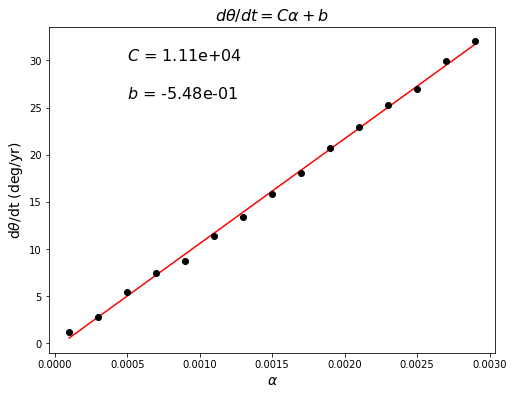

In [47]:
α_vals = []
dθdt_vals = []

for α in np.arange(0.0001, 0.003, 0.0002):
    dθdt = compute_precession(α)
    α_vals.append(α)
    dθdt_vals.append(dθdt)

# make a linear best fit
p = np.polyfit(α_vals, dθdt_vals, 1)

fig, axes = plt.subplots(figsize=(8,6))
plt.plot(α_vals, np.polyval(p, α_vals), 'r-')
plt.plot(α_vals, dθdt_vals, 'ko')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'd$\theta$/dt (deg/yr)', fontsize=14)
#plt.ylim(ymin=0)
plt.title(r'$d\theta/dt = C \alpha + b$', fontsize=16)

plt.text(0.0005, 30, '$C$ = {:.2e}'.format(p[0]), fontsize=16)
plt.text(0.0005, 26, '$b$ = {:.2e}'.format(p[1]), fontsize=16)

C = p[0]

So, if this is going to work out, then need to calculate

$$ \frac{\mathrm{d}\theta}{\mathrm{d}t} = C \alpha $$

where $$\alpha = 1.1 \times 10^{-8}\;\mathrm{AU}^2$$ is the value from general relativity.

In [48]:
α = 1.1e-8
dθdt = C * α
print (dθdt)

0.000122397563007


This is units of degrees / year. In arcseconds / century we have:

In [49]:
print ('Precesion of rate due to general relativity is {:.1f} arcseconds/century'.format(dθdt * 3600 * 100))

Precesion of rate due to general relativity is 44.1 arcseconds/century


as expected.